### Raniery Mendes
### Playing with CNNs and Data Augmentation

In [4]:
new_base_dir = "./splitted_data"
original_dir = "./train"

In [2]:
#function to organize dataset in sets 
import os, shutil, pathlib
def make_subset(subset_name, start_index, end_index): 
    for category in ("cat", "dog"):
            dir = f"{new_base_dir}/{subset_name}/{category}/"
            os.makedirs(dir)
            fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)] 
            for fname in fnames:
                shutil.copyfile(src=f"{original_dir}/{fname}",
                                            dst=f"{dir}/{fname}")


In [3]:
#create training, test, and validation sets.                           
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt


In [5]:
#set up model 
model = keras.Sequential()
model.add(keras.Input(shape=(180,180,3)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1,activation='sigmoid'))





In [6]:

train_dataset = image_dataset_from_directory(f"{new_base_dir}/train", image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(f"{new_base_dir}/validation", image_size=(180, 180),batch_size=32)
test_dataset = image_dataset_from_directory(f"{new_base_dir}/test",image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [7]:
#check all data loaders provide same batch size as expected. 

print("Train")
for batch_data, batch_label in train_dataset:
    print("Data ",batch_data.shape)
    print("Labels ", batch_label.shape)
    break;

print("Test")
for batch_data, batch_label in test_dataset:
    print("Data ",batch_data.shape)
    print("Labels ", batch_label.shape)
    break;
    
print("Validation")
for batch_data, batch_label in validation_dataset:
    print("Data ",batch_data.shape)
    print("Labels ", batch_label.shape)
    break;

Train
Data  (32, 180, 180, 3)
Labels  (32,)
Test
Data  (32, 180, 180, 3)
Labels  (32,)
Validation
Data  (32, 180, 180, 3)
Labels  (32,)


In [8]:
#set up callback so we can monitor the model's performance
#this allow us to save the best model, i.e. save only when we decrease the val loss. 

callbacks = [keras.callbacks.ModelCheckpoint(filepath="my_cnn_model.keras", save_best_only=True, monitor='val_loss')]

In [9]:
#Verify model parameters and set optimizer
model.summary()
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="rmsprop")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#fit the CNN model

history = model.fit(train_dataset,epochs=30,validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 451ms/step - accuracy: 0.4817 - loss: 0.7041 - val_accuracy: 0.5480 - val_loss: 0.6916
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 449ms/step - accuracy: 0.5386 - loss: 0.6919 - val_accuracy: 0.5000 - val_loss: 0.6863
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 465ms/step - accuracy: 0.5553 - loss: 0.6950 - val_accuracy: 0.6210 - val_loss: 0.6439
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 450ms/step - accuracy: 0.6164 - loss: 0.6655 - val_accuracy: 0.6370 - val_loss: 0.6450
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 460ms/step - accuracy: 0.6575 - loss: 0.6173 - val_accuracy: 0.6950 - val_loss: 0.5762
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 463ms/step - accuracy: 0.7009 - loss: 0.5647 - val_accuracy: 0.6820 - val_loss: 0.5776
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 446ms/step - accuracy: 0.7210 - loss: 0.5475 - val_accuracy: 0.6580 - val_loss: 0.6118
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 453ms/step - accuracy: 0.7307 - loss: 0.5254 - val_accu

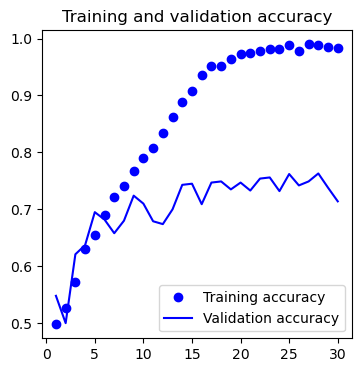

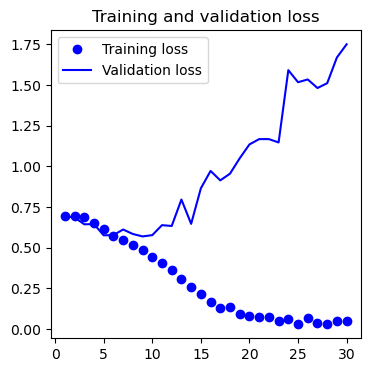

In [17]:
#Plot the behavior of loss during training 

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(4,4))
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure(figsize=(4,4))
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Data Augmentation
<p>In the section below I perform data augmentation on the training data to expand the # of samples the model is exposed to (learns from) </p> 
<p>To do that we need to set a sequential keras model that will randomly modify the original sample</p>

In [18]:
data_augmentation = keras.Sequential()
data_augmentation.add(layers.RandomFlip('horizontal')) #this layer will flip 50% of the images
data_augmentation.add(layers.RandomRotation(0.1)) #rotates the image by a random value in the range -0.1,0.1
data_augmentation.add(layers.RandomZoom(0.2)) #similar to the above but zooming in the range -0.2, 02



2024-04-09 17:56:38.137493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


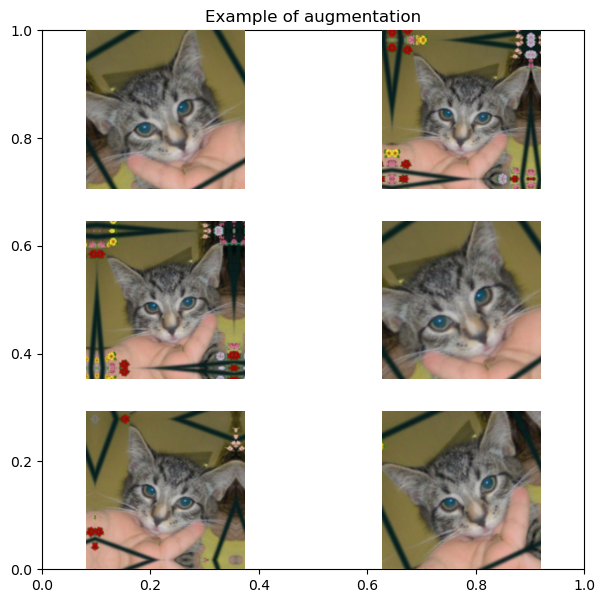

In [22]:
#verify what this augmentation will do 

plt.figure(figsize=(7,7))
plt.title("Example of augmentation")
for images, _ in train_dataset.take(1): #get a single image from the loader
    #we plot just 6 to show how it works
    for i in range(6):
        new_image=data_augmentation(images)
        ax = plt.subplot(3, 2, i + 1) 
        plt.imshow(new_image[0].numpy().astype("uint8")) 
        plt.axis("off")


In [37]:
#now we include that augmentation model to this original one 
model_w_augmentation = keras.Sequential()
model_w_augmentation.add(keras.Input(shape=(180,180,3)))
model_w_augmentation.add(layers.RandomFlip('horizontal')) #this layer will flip 50% of the images
model_w_augmentation.add(layers.RandomRotation(0.1)) #rotates the image by a random value in the range -0.1,0.1
model_w_augmentation.add(layers.RandomZoom(0.2))
model_w_augmentation.add(layers.Rescaling(1./255))
model_w_augmentation.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_w_augmentation.add(layers.MaxPooling2D(pool_size=2))
model_w_augmentation.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model_w_augmentation.add(layers.MaxPooling2D(pool_size=2))
model_w_augmentation.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model_w_augmentation.add(layers.MaxPooling2D(pool_size=2))
model_w_augmentation.add(layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model_w_augmentation.add(layers.MaxPooling2D(pool_size=2))
model_w_augmentation.add(layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model_w_augmentation.add(layers.Flatten())
model_w_augmentation.add(layers.Dropout(0.5))
model_w_augmentation.add(layers.Dense(1,activation='sigmoid'))

model_w_augmentation.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="rmsprop")
call_back_aug = [
    keras.callbacks.ModelCheckpoint(
        filepath="model_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [43]:
history_augmentation = model_w_augmentation.fit(train_dataset, epochs=60,validation_data=validation_dataset, callbacks=call_back_aug )

Epoch 1/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 544ms/step - accuracy: 0.8950 - loss: 0.2446 - val_accuracy: 0.8390 - val_loss: 0.5030
Epoch 2/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 564ms/step - accuracy: 0.9003 - loss: 0.2427 - val_accuracy: 0.8380 - val_loss: 0.5299
Epoch 3/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 555ms/step - accuracy: 0.9141 - loss: 0.2313 - val_accuracy: 0.8030 - val_loss: 0.4876
Epoch 4/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 473ms/step - accuracy: 0.9058 - loss: 0.2385 - val_accuracy: 0.8360 - val_loss: 0.4770
Epoch 5/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 511ms/step - accuracy: 0.9069 - loss: 0.2251 - val_accuracy: 0.8170 - val_loss: 0.5350
Epoch 6/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 477ms/step - accuracy: 0.9161 - loss: 0.2158 - val_accuracy: 0.7940 - val_loss: 0.8756
Epoch 7/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 432ms/step - accuracy: 0.9125 - loss: 0.2163 - val_accuracy: 0.8190 - val_loss: 0.5250
Epoch 8/60
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 456ms/step - accuracy: 0.9081 - loss: 0.2305 - val_accu

In [44]:
#Eval the two models with and without augmentation

test_model_wo = keras.models.load_model("my_cnn_model.keras")
test_loss_wo, test_acc_wo = test_model_wo.evaluate(test_dataset) 
print(f"Test w/o augmentation accuracy: {test_acc_wo:.3f}")

# test_model_aug = keras.models.load_model("model_augmentation.keras")

test_loss_aug, test_acc_aug = model_w_augmentation.evaluate(test_dataset)
print(f"Test w/ augmentation accuracy: {test_acc_aug:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.7504 - loss: 0.5525
Test w/o augmentation accuracy: 0.729
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.8195 - loss: 0.9906
Test w/ augmentation accuracy: 0.832


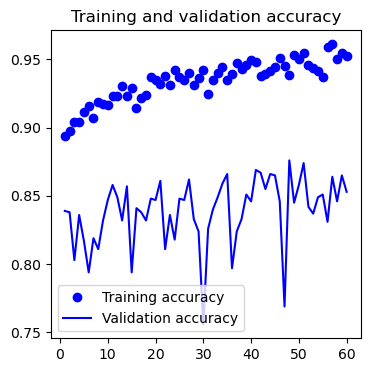

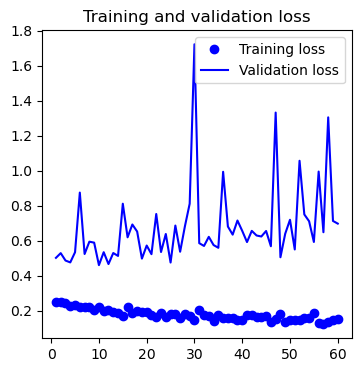

In [45]:
#plot loss over epochs for new model

accuracy = history_augmentation.history["accuracy"]
val_accuracy = history_augmentation.history["val_accuracy"]
loss = history_augmentation.history["loss"]
val_loss = history_augmentation.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(4,4))
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure(figsize=(4,4))
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()